In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras import optimizers
from keras import losses
from keras import metrics
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

# Загружаем датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
model = Sequential([
    Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    
    

    Flatten(),
    Dropout(0.5),
    Dense(64, activation="relu"),

    Dense(10, activation="softmax")
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=256,
    validation_data=(x_val, y_val)
)

Epoch 1/20
196/196 [==============================] - 69s 347ms/step - loss: 0.8266 - accuracy: 0.6975 - val_loss: 0.5016 - val_accuracy: 0.8114
Epoch 2/20
196/196 [==============================] - 68s 349ms/step - loss: 0.4928 - accuracy: 0.8178 - val_loss: 0.4106 - val_accuracy: 0.8462
Epoch 3/20
196/196 [==============================] - 68s 345ms/step - loss: 0.4219 - accuracy: 0.8447 - val_loss: 0.3587 - val_accuracy: 0.8713
Epoch 4/20
196/196 [==============================] - 68s 345ms/step - loss: 0.3828 - accuracy: 0.8604 - val_loss: 0.3290 - val_accuracy: 0.8796
Epoch 5/20
196/196 [==============================] - 68s 345ms/step - loss: 0.3542 - accuracy: 0.8724 - val_loss: 0.3039 - val_accuracy: 0.8880
Epoch 6/20
196/196 [==============================] - 67s 344ms/step - loss: 0.3344 - accuracy: 0.8778 - val_loss: 0.2903 - val_accuracy: 0.8917
Epoch 7/20
196/196 [==============================] - 68s 344ms/step - loss: 0.3169 - accuracy: 0.8843 - val_loss: 0.2786 - val_ac

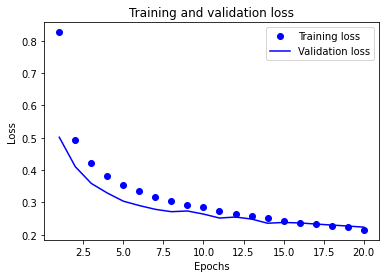

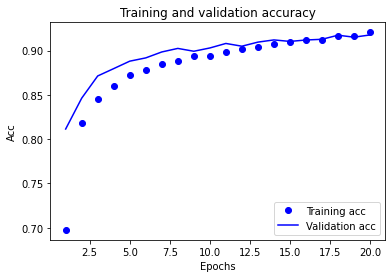

In [ ]:
history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 4s - loss: 0.2444 - accuracy: 0.9112 - 4s/epoch - 14ms/step


In [ ]:
result = model.predict(x_test)

In [ ]:
np.argmax(result[0])

9

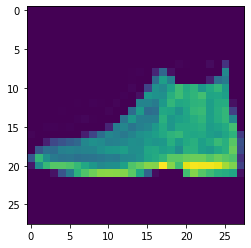

In [ ]:
plt.imshow(x_test[0])